In [1]:
]activate /home/csidrane/AAHAA/src/OVERTVerify.jl

  Activating environment at `~/AAHAA/src/OVERTVerify.jl/Project.toml`


In [2]:
;cd /home/csidrane/AAHAA/src/OVERTVerify.jl

/home/csidrane/AAHAA/src/OVERTVerify.jl


In [95]:
# Plotting for Quad 6D 
using PGFPlots
using QHull
using JLD2
using LazySets
using LinearAlgebra

include("src/dependencies.jl")

# load top 
top_data = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top.jld2")
top_data_1step = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_1step.jld2")
# load bottom
bottom_data = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom.jld2")
bottom_data_1step = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_1step.jld2")

top_data = top_data["top_data"];
top_data_1step = top_data_1step["top_data"];
bottom_data = bottom_data["bottom_data"];
bottom_data_1step = bottom_data_1step["bottom_data"];

In [96]:
top_data.dt + bottom_data.dt + top_data.dt_check + bottom_data.dt_check

1281.4864058494568

In [97]:
# monte carlo simulate top 
mc_state_sets_t, xvec_t, x0_t, mc_meas_sets_t, yvec_t, y0_t = monte_carlo_simulate(top_data.query, top_data.input_set, n_sim=1000000);
# monte carlo simulate bottom
mc_state_sets_b, xvec_b, x0_b, mc_meas_sets_b, yvec_b, y0_b = monte_carlo_simulate(bottom_data.query, bottom_data.input_set, n_sim=1000000);

[-0.899930319864604, 0.05000703710245664, -0.10999388454604352, 0.2640380343882279, -0.0002704832385194492, -0.10106371411952271][-0.7900329637365548, 0.0699916530380289, 0.10992223556442776, 0.36879963213966155, 0.10026850559920153, 0.09895725748969558]
[-0.8733284499138824, 0.04999209467894739, -0.12009665812900035, 0.5266597755823625, -0.0006928681405921555, -0.10212513142722815][-0.75335276744235, 0.07998349262806928, 0.119800133671159, 0.6369011156205304, 0.10048867689675056, 0.0979294496584387]
[-0.8201672025982705, 0.04993524474146033, -0.13030321675668904, 0.7876464801713192, -0.0013219806957382586, -0.10317531850537712][-0.690026309971808, 0.09000644106904805, 0.12957496401659557, 0.9040034401862301, 0.10055499424150106, 0.09691687991513526]
[-0.7408140041275343, 0.04981799557388911, -0.14061330414645035, 1.0471533552800916, -0.0022083978534064557, -0.10421420420563982][-0.6002176257769111, 0.10002153774542219, 0.1392477422342307, 1.169654898285924, 0.10041337415465737, 0.0959

In [126]:

######################
# Plot Styles
######################
define_color("concrete_color", 0x139EAB)
define_color("symbolic_color", 0x9BFF85)
define_color("mc_color", 0x38caff) 
conc_style_solid = "solid, concrete_color, thick, mark=none, fill=concrete_color"
conc_style_transparent = conc_style_solid*", fill opacity=0.0"
sym_style_solid = "solid, symbolic_color, thick, mark=none, fill=symbolic_color"
sym_style_transparent =  sym_style_solid*", fill opacity=0.5"
mc_style_solid = "solid, mc_color, thick, mark=none, fill=mc_color"
mc_style_transparent = mc_style_solid*", fill opacity=0.3"
input_style = "dashed, blue, mark=none"
avoid_set_style = "solid, red, fill=red, fill opacity=0.8, mark=none"
extra_style = "solid, purple, thick, mark=none, fill=purple, fill opacity=0.0"

"solid, purple, thick, mark=none, fill=purple, fill opacity=0.0"

In [99]:
function plot_convex_hull_pgf(xvec, t, dims, fig, style)
    points = xvec[:, t, dims]
    border_idx = chull(points).vertices
    x = points[border_idx, 1]
    y = points[border_idx, 2]
    push!(fig, PGFPlots.Plots.Linear([x..., x[1]], [y..., y[1]], style=style))
end

plot_convex_hull_pgf (generic function with 1 method)

In [70]:
# # Intersect reachable sets with avoid set 
# # construct avoid set as HPolytope from Hyperplanes
# lx = HalfSpace([-1.,  0.,  0., 0., 0., 0.], 0.1) # x >= -0.1  ->  0.1 >= -x aka -x <= 0.1
# hx = HalfSpace([ 1.,  0.,  0., 0., 0., 0.], 0.1) # x <= 0.1
# ly = HalfSpace([ 0., -1.,  0., 0., 0., 0.], 0.1) # -y <= 0.1 aka y >= -0.1
# hy = HalfSpace([ 0.,  1.,  0., 0., 0., 0.], 0.1) # y <= 0.1
# lz = HalfSpace([ 0.,  0., -1., 0., 0., 0.], 0.1) # -z <= 0.1 aka z >= -0.1
# hz = HalfSpace([ 0.,  0.,  1., 0., 0., 0.], 0.1) # z <= 0.1
# avoid_set = HPolytope([lx, hx, ly, hy, lz, hz]) # square 

t=1
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


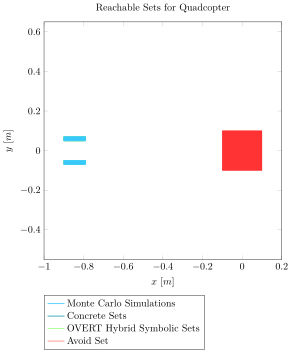

t=2
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


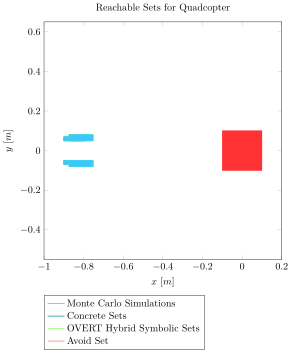

t=3
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


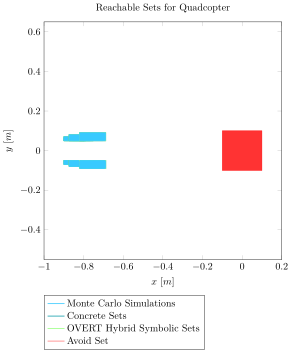

t=4
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


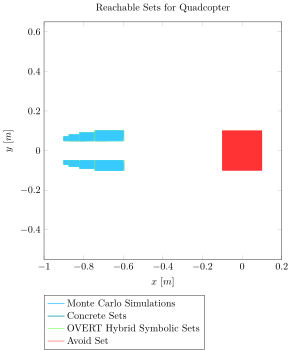

t=5
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


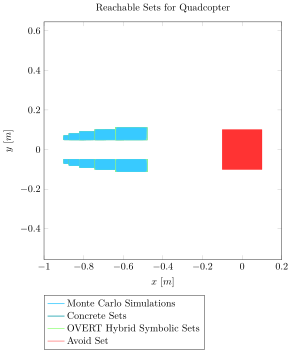

t=6
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


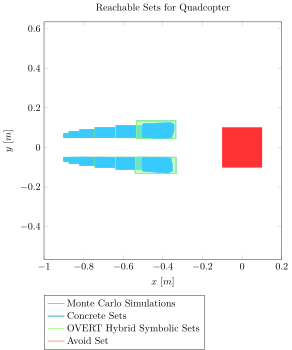

t=7
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


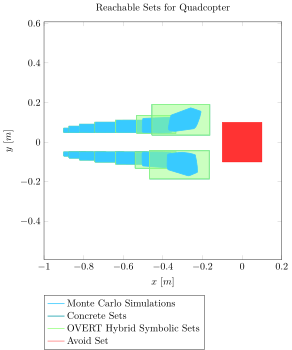

t=8
isempty(top_data.reach_sets[t] ∩ avoid_set):false
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


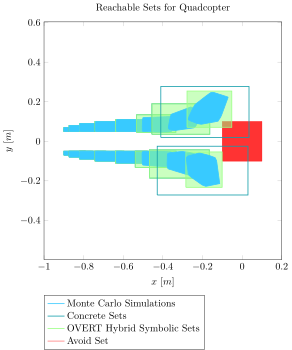

t=9
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


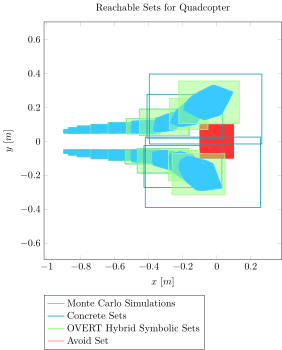

t=10
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


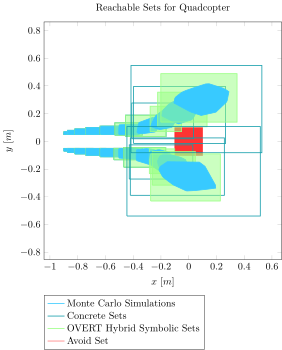

t=11
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


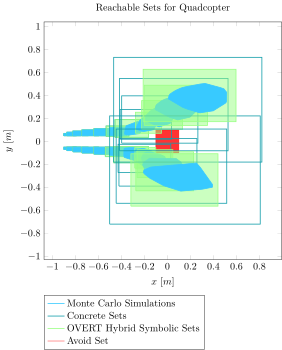

t=12
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


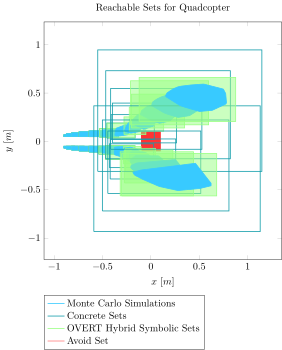

t=13
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


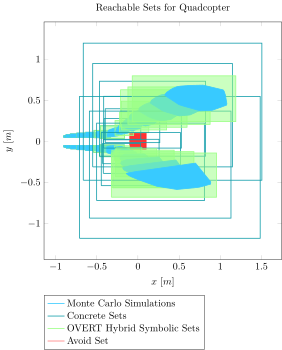

t=14
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


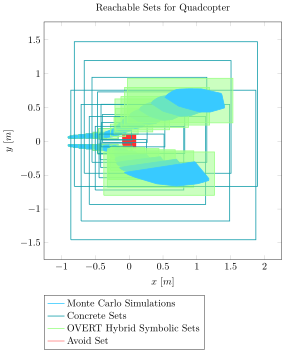

t=15
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


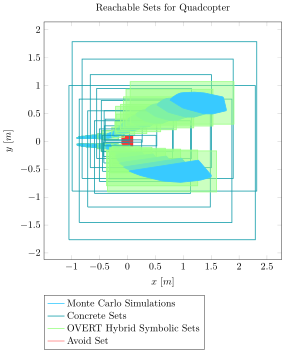

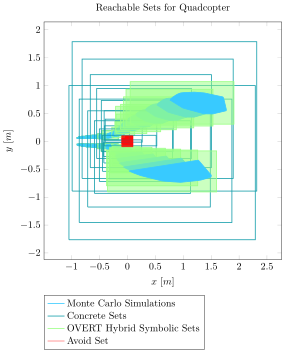

In [60]:
######################
# Plotting in PGF. 
# Plot 1: x-y position of quad + obstacle 
######################
using Polyhedra
dims=[1,2]
avoid_set =  overapproximate(convert(HPolyhedron, eliminate(polyhedron(convert(HPolyhedron,top_data.avoid_sets[1])), [3,4,5,6])), Hyperrectangle)
function init_fig_quad(suffix)
    fig = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter "*suffix)
    # hack for legend
    push!(fig, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
    # plot init set in both concrete and hybrid colors
    inputx, inputy = get_rectangle(top_data.input_set, dims)
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=conc_style_transparent, legendentry="Concrete Sets"))
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=sym_style_transparent, legendentry="OVERT Hybrid Symbolic Sets"))
    # plot avoid set
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
    fig.legendStyle =  "at={(0,-0.15)}, anchor=north west"
    return fig
end
fig = init_fig_quad(" ")
for t in 1:top_data.query.ntime
#     fig = init_fig_quad()
    if t == top_data.query.ntime
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    else
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    end 
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(top_data.reach_sets[t], dims)..., style=sym_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(bottom_data.reach_sets[t], dims)..., style=sym_style))
    # plot mc_sim points 
    plot_convex_hull_pgf(xvec_t, t, dims, fig, mc_style_solid)
    plot_convex_hull_pgf(xvec_b, t, dims, fig, mc_style_solid)
    println("t=",t)
    println("isempty(top_data.reach_sets[t] ∩ avoid_set):", isempty(top_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    println("isempty(bottom_data.reach_sets[t] ∩ avoid_set):", isempty(bottom_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    display(fig)
end
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style))
display(fig)

t=8


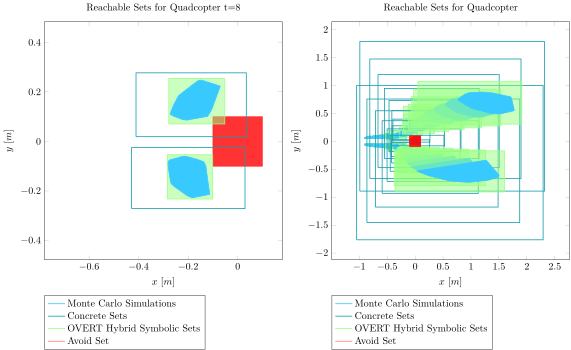

┌ Warning: quaddoubleplot.pdf already exists, overwriting!
└ @ TikzPictures /home/csidrane/.julia/packages/TikzPictures/1hS0x/src/TikzPictures.jl:244


2-element Vector{Vector{Nothing}}:
 [nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing]
 [nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing  …  nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing]

In [62]:
 g = GroupPlot(2, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
 t = 8
 suffix = "t=$t"
 fig1 = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter "*suffix)
 # hack for legend
 push!(fig1, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
 # plot init set in both concrete and hybrid colors
 inputx, inputy = get_rectangle(top_data.input_set, dims)
 push!(fig1, PGFPlots.Plots.Linear([0.], [0.], style=conc_style_transparent, legendentry="Concrete Sets"))
 push!(fig1, PGFPlots.Plots.Linear([0.], [0.], style=sym_style_transparent, legendentry="OVERT Hybrid Symbolic Sets"))
 # plot avoid set
 push!(fig1, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
 fig1.legendStyle =  "at={(0,-0.15)}, anchor=north west"

 conc_style = conc_style_transparent
        sym_style = sym_style_transparent
 push!(fig1, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig1, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig1, PGFPlots.Plots.Linear( get_rectangle(top_data.reach_sets[t], dims)..., style=sym_style))
    push!(fig1, PGFPlots.Plots.Linear( get_rectangle(bottom_data.reach_sets[t], dims)..., style=sym_style))
    # plot mc_sim points 
    plot_convex_hull_pgf(xvec_t, t, dims, fig1, mc_style_solid)
    plot_convex_hull_pgf(xvec_b, t, dims, fig1, mc_style_solid)
    println("t=",t)
push!(g, fig1 )
push!(g, fig)
display(g)
PGFPlots.save("quaddoubleplot.tex", g)
PGFPlots.save("quaddoubleplot.pdf", g)

# Next load early stopping data and do comparisons
specifically, comparisons of hybrid symbolic sets through trajectory (and maybe highlight of sets at timesteps 7-9?)

In [11]:
# load top 
top_data_es = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_earlystopping_take2.jld2")
top_data_1step_es = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_1step_earlystopping.jld2")
# load bottom
bottom_data_es = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_earlystopping_take2.jld2")
bottom_data_1step_es = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_1step_earlystopping.jld2")

top_data_es = top_data_es["top_data"];
top_data_1step_es = top_data_1step_es["top_data"];
bottom_data_es = bottom_data_es["bottom_data"];
bottom_data_1step_es = bottom_data_1step_es["bottom_data"];

In [12]:
top_data_es.dt + bottom_data_es.dt + top_data_es.dt_check + bottom_data_es.dt_check

682.2718870639801

t=1
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


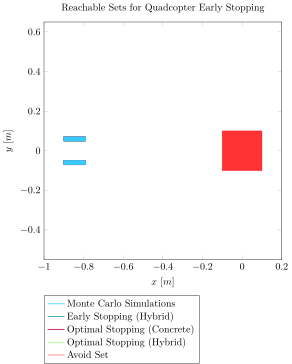

t=2
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


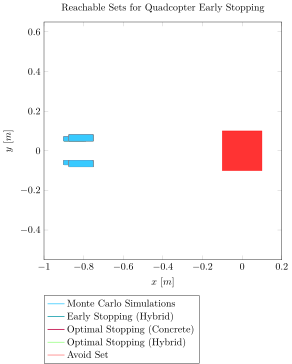

t=3
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


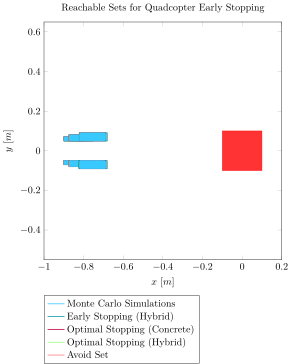

t=4
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


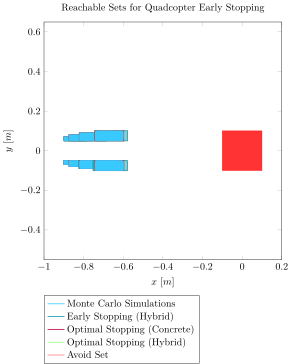

t=5
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


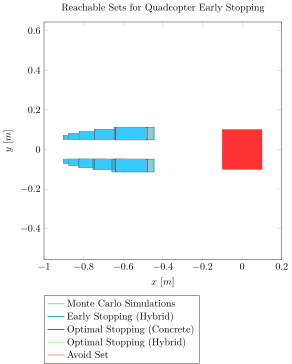

t=6
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


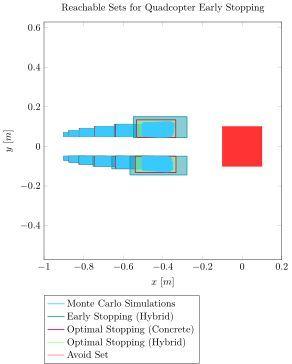

t=7
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


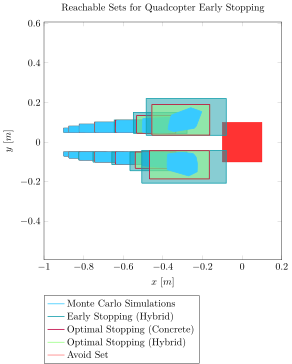

t=8
isempty(top_data.reach_sets[t] ∩ avoid_set):false
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


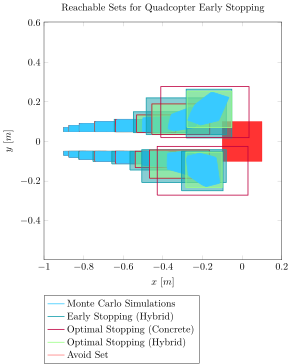

t=9
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


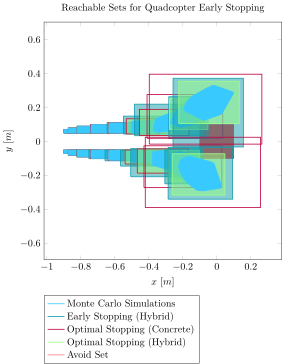

t=10
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


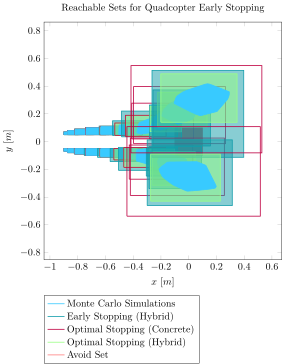

t=11
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


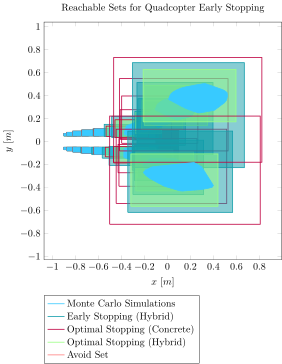

t=12
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


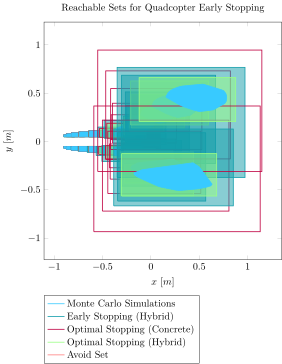

t=13
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


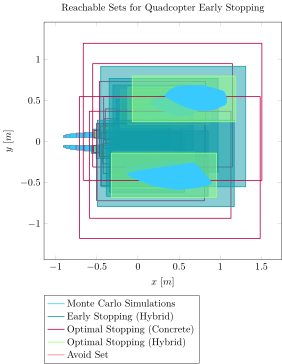

t=14
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


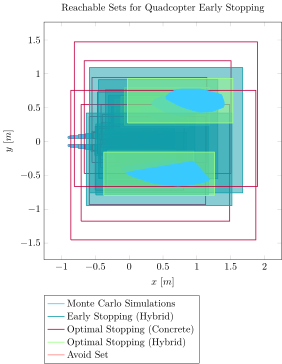

t=15
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


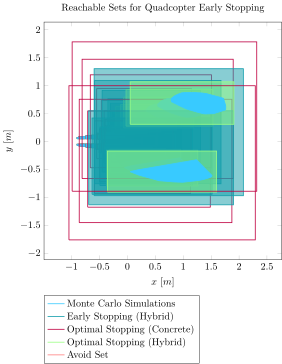

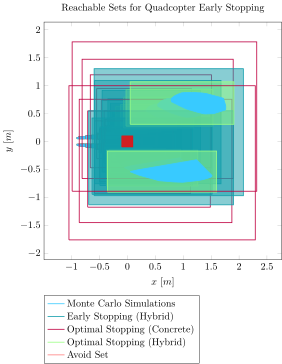

In [128]:
dims=[1,2]
conc_style_semitransparent = conc_style_solid*", fill opacity=0.5"
avoid_set =  overapproximate(convert(HPolyhedron, eliminate(polyhedron(convert(HPolyhedron,top_data_es.avoid_sets[1])), [3,4,5,6])), Hyperrectangle)
function init_fig_quad(suffix)
    fig = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter "*suffix)
    # hack for legend
    push!(fig, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
    # plot init set in both concrete and hybrid colors
    inputx, inputy = get_rectangle(top_data_es.input_set, dims)
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=conc_style_semitransparent, legendentry="Early Stopping (Hybrid)"))
    push!(fig, PGFPlots.Plots.Linear([0.,], [0.], style=extra_style, legendentry="Optimal Stopping (Concrete)"))
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=sym_style_transparent, legendentry="Optimal Stopping (Hybrid)"))
    # plot avoid set
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
    fig.legendStyle =  "at={(0,-0.15)}, anchor=north west"
    return fig
end
fig_es = init_fig_quad(" Early Stopping ")
for t in 1:top_data.query.ntime
#     fig = init_fig_quad()
    if t == top_data.query.ntime
        conc_style = conc_style_semitransparent
        sym_style = sym_style_transparent
    else
        conc_style = conc_style_semitransparent
        sym_style = sym_style_transparent
    end 
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(top_data_es.reach_sets[t], dims)..., style=conc_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(bottom_data_es.reach_sets[t], dims)..., style=conc_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(top_data.reach_sets[t], dims)..., style=sym_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(bottom_data.reach_sets[t], dims)..., style=sym_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=extra_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=extra_style))
    # plot mc_sim points 
    plot_convex_hull_pgf(xvec_t, t, dims, fig_es, mc_style_solid)
    plot_convex_hull_pgf(xvec_b, t, dims, fig_es, mc_style_solid)
    println("t=",t)
    println("isempty(top_data.reach_sets[t] ∩ avoid_set):", isempty(top_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    println("isempty(bottom_data.reach_sets[t] ∩ avoid_set):", isempty(bottom_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    display(fig_es)
end
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style))
display(fig_es)

t=8


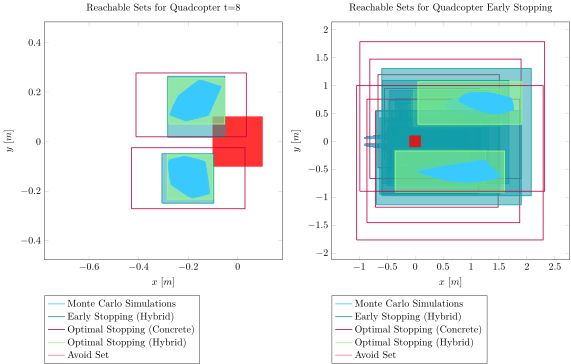

┌ Warning: quaddoubleplot_es_comparison.pdf already exists, overwriting!
└ @ TikzPictures /home/csidrane/.julia/packages/TikzPictures/1hS0x/src/TikzPictures.jl:244


2-element Vector{Vector{Nothing}}:
 [nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing]
 [nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing  …  nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing, nothing]

In [132]:
# Make double plot illustrating tradeoff between early stopping and solving to optimality
t = 8
fig_es_t7 = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter t=$t")
# hack for legend
push!(fig_es_t7, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
# plot init set in both concrete and hybrid colors
inputx, inputy = get_rectangle(top_data_es.input_set, dims)
push!(fig_es_t7, PGFPlots.Plots.Linear([0.,], [0.], style=conc_style_semitransparent, legendentry="Early Stopping (Hybrid)"))
push!(fig_es_t7, PGFPlots.Plots.Linear([0.,], [0.], style=extra_style, legendentry="Optimal Stopping (Concrete)"))
push!(fig_es_t7, PGFPlots.Plots.Linear([0.,], [0.], style=sym_style_transparent, legendentry="Optimal Stopping (Hybrid)"))
# plot avoid set
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
fig_es_t7.legendStyle =  "at={(0,-0.15)}, anchor=north west"

g = GroupPlot(2, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")

conc_style = conc_style_semitransparent
sym_style = sym_style_transparent
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(top_data_es.reach_sets[t], dims)..., style=conc_style))
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(bottom_data_es.reach_sets[t], dims)..., style=conc_style))
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(top_data.reach_sets[t], dims)..., style=sym_style))
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(bottom_data.reach_sets[t], dims)..., style=sym_style))
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=extra_style))
push!(fig_es_t7, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=extra_style))
# plot mc_sim points 
plot_convex_hull_pgf(xvec_t, t, dims, fig_es_t7, mc_style_solid)
plot_convex_hull_pgf(xvec_b, t, dims, fig_es_t7, mc_style_solid)
println("t=",t)
push!(g, fig_es_t7 )
push!(g, fig_es)
display(g)
PGFPlots.save("quaddoubleplot_es_comparison.tex", g)
PGFPlots.save("quaddoubleplot_es_comparison.pdf", g)

In [42]:
print(length(top_data_1step.sym_st_sets))

15

### Load data from 88 core machine (oceanside)
for time comparison

In [66]:
# load top 
top_data_es_88 = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_earlystopping_88cores_take2.jld2")
top_data_88 = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_88cores.jld2")
# load bottom
bottom_data_es_88 = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_earlystopping_88cores_take2.jld2")
bottom_data_88 = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_88cores.jld2")

top_data_es_88 = top_data_es_88["top_data"];
top_data_88 = top_data_88["top_data"];
bottom_data_es_88 = bottom_data_es_88["bottom_data"];
bottom_data_88 = bottom_data_88["bottom_data"];

In [67]:
top_data_88.dt + bottom_data_88.dt + top_data_88.dt_check + bottom_data_88.dt_check

982.1295716762543

In [68]:
top_data_es_88.dt + bottom_data_es_88.dt + top_data_es_88.dt_check + bottom_data_es_88.dt_check

684.4008662700653

# Compute looseness of reachable sets for both early stopping and optimal stopping to compare

In [113]:
using Statistics
function compute_volume_diff(sets1, sets2; metric="ratio")
    # Compute avg difference in volume between sets1 and sets2
    # diff metric:
    # uses vol(sets1[i]) - vol(sets2[i])/vol(sets2[i]) so how much greater is the volume of sets in sets1 relative to size of sets in sets2 
    # ratio metric:
    # vol(sets1[i])/vol(sets2[i])
    println("metric =", metric)
    @assert(length(sets1) == length(sets2))
    avg_vdiff = 0.
    for i = 1:length(sets1)
        v1 = LazySets.volume(sets1[i])
        v2 = LazySets.volume(sets2[i])
        if metric == "diff"
            vdiff = (v1 - v2)/v2
        elseif metric == "ratio"
            vdiff = v1/v2
        end
        # println("vdiff = $vdiff")
        avg_vdiff += vdiff
    end
    avg_vdiff /= length(sets1)
    return avg_vdiff # an average
end

function compute_maxmin_vdiff(sets1, sets2; metric="ratio")
    # Compute avg difference in volume between sets1 and sets2
    # diff metric:
    # uses vol(sets1[i]) - vol(sets2[i])/vol(sets2[i]) so how much greater is the volume of sets in sets1 relative to size of sets in sets2 
    # ratio metric:
    # vol(sets1[i])/vol(sets2[i])
    println("metric =", metric)
    @assert(length(sets1) == length(sets2))
    min_vdiff = Inf
    max_vdiff = -Inf
    for i = 1:length(sets1)
        v1 = LazySets.volume(sets1[i])
        v2 = LazySets.volume(sets2[i])
        if metric == "diff"
            vdiff = (v1 - v2)/v2
        elseif metric == "ratio"
            vdiff = v1/v2
        end
        # println("vdiff = $vdiff")
        min_vdiff = vdiff < min_vdiff ? vdiff : min_vdiff
        max_vdiff = vdiff > max_vdiff ? vdiff : max_vdiff 
    end
    return min_vdiff, max_vdiff
end

function compute_maxmin_rdiff(sets1, sets2; metric="ratio")
    # Compute avg difference in volume between sets1 and sets2
    # diff metric:
    # uses vol(sets1[i]) - vol(sets2[i])/vol(sets2[i]) so how much greater is the volume of sets in sets1 relative to size of sets in sets2 
    # ratio metric:
    # vol(sets1[i])/vol(sets2[i])
    println("metric =", metric)
    @assert(length(sets1) == length(sets2))
    min_rdiff = Inf
    max_rdiff = -Inf
    for i = 1:length(sets1)
        r1 = sets1[i].radius
        r2 = sets2[i].radius
        if metric == "diff"
            r_min, r_max = minimum((r1 .- r2)./r2), maximum((r1 .- r2)./r2)
        elseif metric == "ratio"
            # println(r1./r2)
            r_min, r_max = minimum(r1./r2), maximum(r1./r2)
        end
        # println("rdiff = $rdiff")
        min_rdiff = r_min < min_rdiff ? r_min : min_rdiff
        max_rdiff = r_max > max_rdiff ? r_max : max_rdiff 
    end
    return min_rdiff, max_rdiff
end

function compute_radius_diff(sets1, sets2; metric="ratio")
    println("metric = $metric")
    @assert(length(sets1) == length(sets2))
    avg_rdiff = 0.
    for i = 1:length(sets1)
        r1 = sets1[i].radius
        r2 = sets2[i].radius
        if metric == "diff"
            rdiff = mean((r1 .- r2)./r2)
        elseif metric == "ratio"
            # println(r1./r2)
            rdiff = mean(r1./r2)
        end
        # println("rdiff = $rdiff")
        avg_rdiff += rdiff
    end
    avg_rdiff /= length(sets1)
    return avg_rdiff # an average
end

compute_radius_diff (generic function with 1 method)

In [86]:
all_data_es = vcat(top_data_es.reach_sets, bottom_data_es.reach_sets)
all_data_os = vcat(top_data.reach_sets, bottom_data.reach_sets)
avg_vdiff = compute_volume_diff(all_data_es, all_data_os)
println("For 56 core machine, early stopping sets are $(avg_vdiff) times as large as optimal stopping sets on average in VOLUME.")

avg_rdiff = compute_radius_diff(all_data_es, all_data_os)
println("For 56 core machine, early stopping sets are $(avg_rdiff) times larger than optimal stopping sets on average in RADIUS.")

metric =ratio
vdiff = 1.1653830464386083
vdiff = 1.627656871376427
vdiff = 2.123885702551735
vdiff = 3.3047254587347896
vdiff = 4.1331165210442835
vdiff = 3.281335556757526
vdiff = 2.777900261791125
vdiff = 5.428108613362013
vdiff = 6.155724303693346
vdiff = 8.087951541114194
vdiff = 11.227146209867778
vdiff = 35.681130878163046
vdiff = 56.068787543826716
vdiff = 90.27702024559976
vdiff = 124.12805853674053
vdiff = 1.1423993828553245
vdiff = 1.826411664166483
vdiff = 2.5392733236390783
vdiff = 4.256254632646418
vdiff = 4.56165289800016
vdiff = 3.2923314008544495
vdiff = 2.991435056961479
vdiff = 3.1566629063638336
vdiff = 3.6622159604842315
vdiff = 4.427361826568601
vdiff = 5.763493804541341
vdiff = 13.119587822777591
vdiff = 16.1872623634703
vdiff = 20.12198761093302
vdiff = 29.52285609947372
For 56 core machine, early stopping sets are 15.734637268159927 times as large as optimal stopping sets on average in VOLUME.
For 56 core machine, early stopping sets are 1.4595292209253614 times

In [59]:
# Sanity check: make sure sets from 88 core machine and 56 core machine are the same for optimal at least (and could compare early stopping out of curiosity)
avg_vdiff = compute_volume_diff(top_data.reach_sets, top_data_88.reach_sets)
println("For 88 vs 56 core machines, optimal stopping sets are $(avg_vdiff) times larger than optimal stopping sets on average in VOLUME.")

avg_rdiff = compute_radius_diff(top_data.reach_sets, top_data_88.reach_sets)
println("For 88 vs 56 core machines, optimal stopping sets are $(avg_rdiff) times larger than optimal stopping sets on average in RADIUS.")

avg_vdiff = compute_volume_diff(top_data_es.reach_sets, top_data_es_88.reach_sets)
println("For 88 vs 56 core machines, early stopping sets are $(avg_vdiff) times larger than optimal stopping sets on average in VOLUME.")

avg_rdiff = compute_radius_diff(top_data_es.reach_sets, top_data_es_88.reach_sets)
println("For 88 vs 56 core machines, early stopping sets are $(avg_rdiff) times larger than optimal stopping sets on average in RADIUS.")

For 88 vs 56 core machines, optimal stopping sets are 1.0000195755503183 times larger than optimal stopping sets on average in VOLUME.
For 88 vs 56 core machines, optimal stopping sets are 1.0000032625719386 times larger than optimal stopping sets on average in RADIUS.
For 88 vs 56 core machines, early stopping sets are 0.9896804738485071 times larger than optimal stopping sets on average in VOLUME.
For 88 vs 56 core machines, early stopping sets are 0.9983325036185486 times larger than optimal stopping sets on average in RADIUS.


In [80]:
# compare 1step sets to hybrid symbolic
avg_vdiff = compute_volume_diff(top_data_1step.sym_st_sets, top_data.reach_sets,)
println("For 56 core machine, concrete sets are $(avg_vdiff) times larger than hybrid-symbolic sets on average in VOLUME.")

# compare 1step sets
avg_rdiff = compute_radius_diff(top_data_1step.sym_st_sets, top_data.reach_sets,)
println("For 56 core machine, concrete sets are $(avg_rdiff) times larger than hybrid-symbolic sets on average in RADIUS.")

metric =ratio
vdiff = 1.0
vdiff = 0.9999986565585539
vdiff = 0.9999957267017687
vdiff = 0.9999953443855457
vdiff = 0.9999961282940384
vdiff = 0.999997763134872
vdiff = 0.9999983258188007
vdiff = 19.620819887901987
vdiff = 16.68475007801694
vdiff = 18.38647656750382
vdiff = 22.6290140827799
vdiff = 125.14751674989554
vdiff = 177.13108733797634
vdiff = 259.7260682499522
vdiff = 447.2692957081258
For 56 core machine, concrete sets are 72.90633404046974 times larger than hybrid-symbolic sets on average in VOLUME.
For 56 core machine, concrete sets are 1.630511793682904 times larger than hybrid-symbolic sets on average in RADIUS.


t=1
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


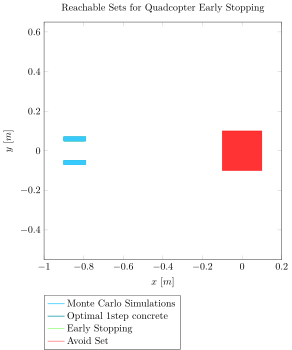

t=2
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


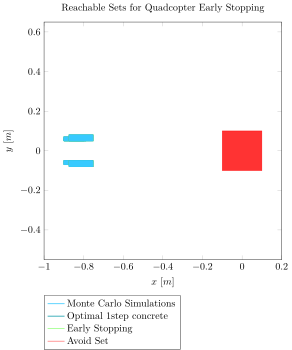

t=3
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


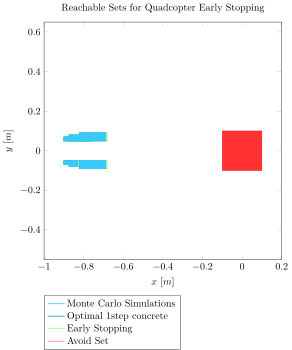

t=4
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


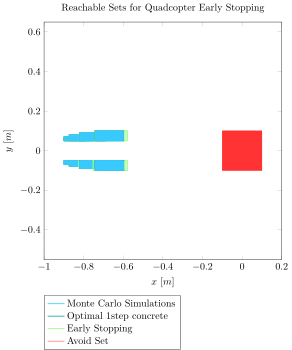

t=5
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


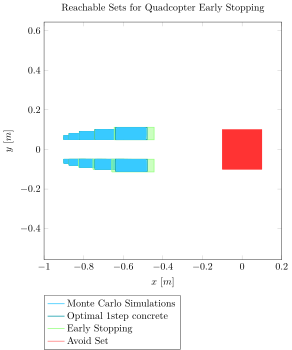

t=6
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


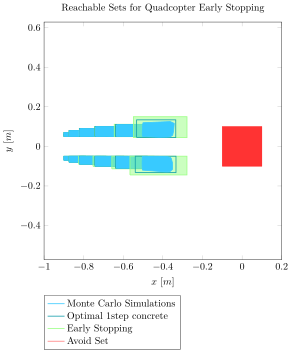

t=7
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


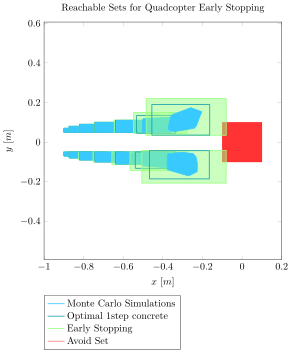

t=8
isempty(top_data.reach_sets[t] ∩ avoid_set):false
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


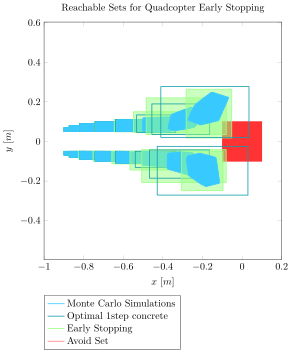

t=9
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


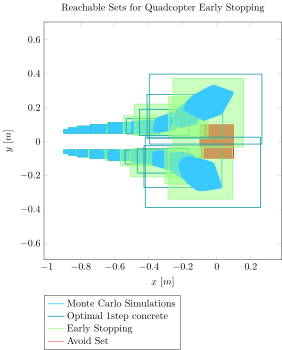

t=10
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


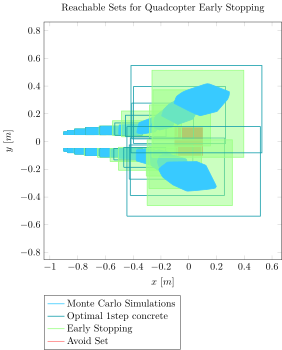

t=11
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


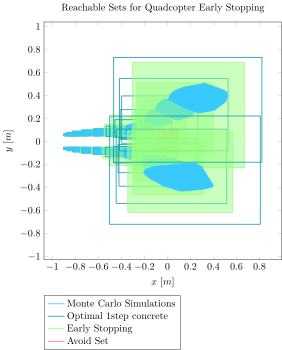

t=12
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


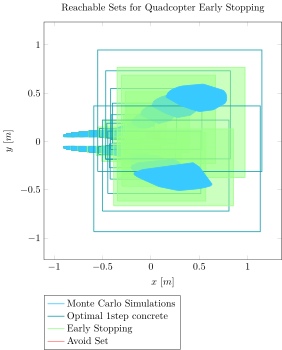

t=13
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


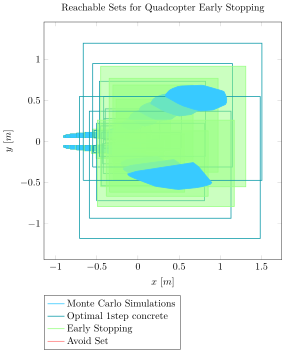

t=14
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


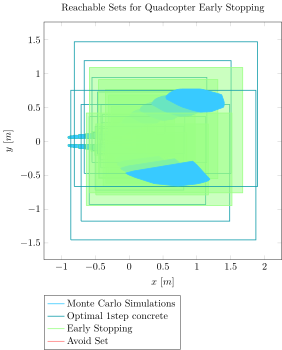

t=15
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


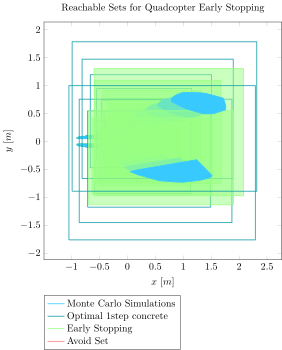

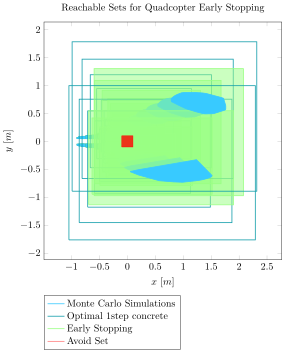

In [103]:
# Plot 1step optimal vs earlystopping 
using Polyhedra
dims=[1,2]
conc_style_semitransparent = conc_style_solid*", fill opacity=0.5"
avoid_set =  overapproximate(convert(HPolyhedron, eliminate(polyhedron(convert(HPolyhedron,top_data_es.avoid_sets[1])), [3,4,5,6])), Hyperrectangle)
function init_fig_quad(suffix)
    fig = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter "*suffix)
    # hack for legend
    push!(fig, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
    # plot init set in both concrete and hybrid colors
    inputx, inputy = get_rectangle(top_data_es.input_set, dims)
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=conc_style_transparent, legendentry="Optimal 1step concrete"))
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=sym_style_transparent, legendentry="Early Stopping"))
    # plot avoid set
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
    fig.legendStyle =  "at={(0,-0.15)}, anchor=north west"
    return fig
end
fig_es = init_fig_quad(" Early Stopping ")
for t in 1:top_data.query.ntime
#     fig = init_fig_quad()
    if t == top_data.query.ntime
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    else
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    end 
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(top_data_es.reach_sets[t], dims)..., style=sym_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(bottom_data_es.reach_sets[t], dims)..., style=sym_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    # plot mc_sim points 
    plot_convex_hull_pgf(xvec_t, t, dims, fig_es, mc_style_solid)
    plot_convex_hull_pgf(xvec_b, t, dims, fig_es, mc_style_solid)
    println("t=",t)
    println("isempty(top_data.reach_sets[t] ∩ avoid_set):", isempty(top_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    println("isempty(bottom_data.reach_sets[t] ∩ avoid_set):", isempty(bottom_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    display(fig_es)
end
    push!(fig_es, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style))
display(fig_es)

In [116]:
# compare 1step sets to early stopping. Does it erase the gains?
# doesn't make sense to use averages because sometimes sets are smaller, and sometimes sets are larger. These leads to negatives and weird stuff that cancels
# so compute min and max 
min_vdiff, max_vdiff = compute_maxmin_vdiff(top_data_1step.sym_st_sets, top_data_es.reach_sets; metric="ratio")
println(min_vdiff, " ,",max_vdiff)
min_rdiff, max_rdiff = compute_maxmin_rdiff(top_data_1step.sym_st_sets, top_data_es.reach_sets; metric="ratio")
println(min_rdiff, " ,",max_rdiff)

metric =ratio
0.24194723841015178 ,3.6146697285317253
metric =ratio
0.39556492706355734 ,1.934381065260789


In [118]:
min_vdiff, max_vdiff = compute_maxmin_vdiff(top_data_es.reach_sets, top_data_1step.sym_st_sets; metric="ratio")
println(min_vdiff, " ,",max_vdiff)
min_rdiff, max_rdiff = compute_maxmin_rdiff(top_data_es.reach_sets, top_data_1step.sym_st_sets,; metric="ratio")
println(min_rdiff, " ,",max_rdiff)

metric =ratio
0.2766504480635355 ,4.133132523318114
metric =ratio
0.5169612223562488 ,2.5280299935169053


In [104]:
top_data_1step.dt 

15.601688861846924

In [105]:
top_data_es.dt

346.1218349933624

In [106]:
1/1.79

0.5586592178770949